In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

In [38]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4)

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5.)

In [39]:
num = 1000
x = 6. * (np.arange(num, dtype=np.float64) + 0.5) / np.float64(num)

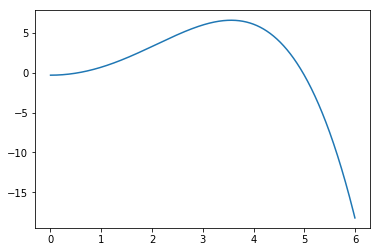

In [40]:
plt.plot(x, func(x))

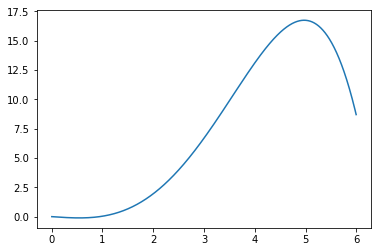

In [41]:
plt.plot(x, func_integral(x))

In [47]:
range = [0., 5.]
num = 1001
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num - 1.)
dx = (range[1] - range[0]) / np.float64(num - 1.)

In [48]:
traps_weights = np.ones(num, dtype=np.float64)
traps_weights[0] = traps_weights[0] * 0.5
traps_weights[-1] = traps_weights[-1] * 0.5

In [49]:
print(traps_weights)

[ 0.5  1.   1.  ...,  1.   1.   0.5]


In [50]:
traps_integral = (func(x) * traps_weights * dx).sum()
print(traps_integral)
real_integral = func_integral(range[1]) - func_integral(range[0])
print(real_integral)
print(traps_integral - real_integral)
print((traps_integral - real_integral) / real_integral)

16.7291432292
16.729166666666664
-2.34374947929e-05
-1.40099595275e-06


In [54]:
num = 1001
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num - 1.)
dx = (range[1] - range[0]) / np.float64(num - 1.)
simps_weights = np.zeros(num, dtype=np.float64)
simps_weights[0] = 1. / 3.
simps_weights[-1] = 1. / 3.
simps_weights[1:-1:2] = np.zeros(num // 2, dtype=np.float64) + 4. / 3.
simps_weights[2:-1:2] = np.zeros(num // 2 - 1, dtype=np.float64) + 2. / 3.

In [55]:
print(simps_weights)

[ 0.33333333  1.33333333  0.66666667 ...,  0.66666667  1.33333333
  0.33333333]


In [56]:
simps_integral = (func(x) * simps_weights * dx).sum()
print(simps_integral)
real_integral = func_integral(range[1]) - func_integral(range[0])
print(real_integral)
print(simps_integral - real_integral)
print((simps_integral - real_integral) / real_integral)

16.7291666666
16.729166666666664
-2.08331130125e-11
-1.24531684259e-12


In [57]:
def func(x=None):
    return (np.exp(- x))

In [58]:
def func_rescale(xp=None, a=None):
    x = a * (1. + xp) / (1. - xp)
    weight = 2. * a / (1. - xp)**2
    return (weight * func(x=x))

In [59]:
num = 1001
range = np.array([-1., 1.], dtype=np.float64)
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num)
dx = (range[1] - range[0]) / np.float64(num)
simps_weights = np.zeros(num, dtype=np.float64)
simps_weights[0] = 1. / 3.
simps_weights[-1] = 1. / 3.
simps_weights[1:-1:2] = np.zeros(num // 2, dtype=np.float64) + 4. / 3.
simps_weights[2:-1:2] = np.zeros(num // 2 - 1, dtype=np.float64) + 2. / 3.

In [60]:
a = 0.1
simps_integral = (func_rescale(x, a=a) * simps_weights * dx).sum()
print(simps_integral - 1.)

6.43449737936e-11


In [61]:
a = 1.
simps_integral = (func_rescale(x, a=a) * simps_weights * dx).sum()
print(simps_integral - 1.)

5.55111512313e-15


In [62]:
a = 10.
simps_integral = (func_rescale(x, a=a) * simps_weights * dx).sum()
print(simps_integral - 1.)

7.52531370551e-12


In [75]:
y1 = np.float64(0.339981043585)
y2 = np.float64(0.861136311594)
w1 = np.float64(0.652145154862)
w2 = np.float64(0.347854845137)
xp = np.array([- y2, - y1, y1, y2], dtype=np.float64)
gauss_weights = np.array([w2, w1, w1, w2], dtype=np.float64)

In [77]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4)

def func_rescale(xp=None, range=None):
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5.)

In [79]:
range = np.array([0., 5.], dtype=np.float64)
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

16.7291666667
16.7291666667
-1.53335122377e-11


In [96]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4 + 0.0017 * x**6 - 0.0004 * x**7)

def func_rescale(xp=None, range=None):
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5. +
           0.0017 * x**7 / 7. - 0.0004 * x**8 / 8.)

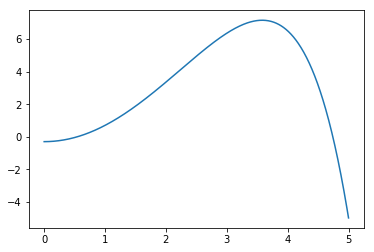

In [97]:
x = np.arange(1000) / np.float64(999) * (range[1] - range[0]) + range[0]
plt.plot(x, func(x))

In [98]:
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

16.1711309524
16.1711309524
-1.33404398639e-11


In [108]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4 + 0.0017 * x**6 - 0.0004 * x**7 + 0.00002 * x**8)

def func_rescale(xp=None, range=None):
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5. +
           0.0017 * x**7 / 7. - 0.0004 * x**8 / 8. + 0.00002 * x**9 / 9.)

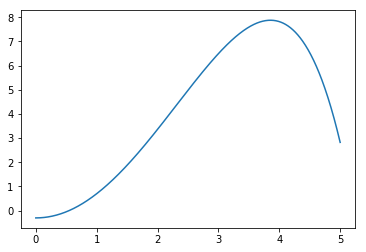

In [109]:
x = np.arange(1000) / np.float64(999) * (range[1] - range[0]) + range[0]
plt.plot(x, func(x))

In [114]:
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

20.5105229592
20.5114087302
-0.000885770994238


In [115]:
(gauss_integral, none) = integrate.fixed_quad(func, range[0], range[1], n=4)
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

20.5105229592
20.5114087302
-0.000885770975056


In [116]:
(gauss_integral, none) = integrate.fixed_quad(func, range[0], range[1], n=5)
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

20.5114087302
20.5114087302
0.0
